# Centerline velocity plot

In [14]:
import numpy as np
import itsinv
import pandas as pd
import scipy
import tqdm
import matplotlib.pyplot as plt
import pickle

## Load points

In [2]:
points = pd.read_csv("./centerline_points_100m.csv")

## Iterate through them, inverting for velocity timeseries then interpolating it onto fixed times

In [3]:
# Interpolate to daily velocities
s_in_day = 60 * 60 * 24
epoch = 2015
epoch = np.datetime64(str(epoch), "s")

# datetime64 bounds and steps
t0 = np.datetime64("2016-01-01")
t1 = np.datetime64("2024-01-01")
dt = np.timedelta64(1, "D")
nstep = int((t1 - t0) / dt)
tsteps = np.array([t0 + dt * i for i in range(nstep)]).astype("datetime64[ns]")

speeds = np.zeros((len(tsteps), len(points)))

for i, point in tqdm.tqdm(points.iterrows(), total=len(points)):
    try:
        vpnt = itsinv.single_point_inversion((point.X, point.Y), lt=1e-4, sat_filt=["1A"], start_date=t0, stop_date=t1, return_data=False)
    except Exception as e:
        print(e)
        continue
    if(len(vpnt["time"]) < 3):
        continue
    v = np.sqrt(vpnt["vx"]**2 + vpnt["vy"]**2)
    cs = scipy.interpolate.CubicSpline(vpnt["time"].to_numpy().astype("datetime64[ns]"), v)
    speeds[:,i] = cs(tsteps)

  0%|                                                                                                                          | 0/277 [00:00<?, ?it/s]

original xy (-3313121.5713822, 262837.451264738) 3413 maps to datacube (-3313121.5713822, 262837.451264738) EPSG:3413


  0%|▍                                                                                                               | 1/277 [00:14<1:08:58, 14.99s/it]

original xy (-3313076.57695381, 262748.145601908) 3413 maps to datacube (-3313076.57695381, 262748.145601908) EPSG:3413


  1%|▊                                                                                                                 | 2/277 [00:20<43:18,  9.45s/it]

original xy (-3313031.58252541, 262658.839939079) 3413 maps to datacube (-3313031.58252541, 262658.839939079) EPSG:3413


  1%|█▏                                                                                                                | 3/277 [00:25<33:08,  7.26s/it]

original xy (-3312986.58809702, 262569.534276249) 3413 maps to datacube (-3312986.58809702, 262569.534276249) EPSG:3413


  1%|█▋                                                                                                                | 4/277 [00:29<28:19,  6.23s/it]

original xy (-3312941.59366862, 262480.22861342) 3413 maps to datacube (-3312941.59366862, 262480.22861342) EPSG:3413


  2%|██                                                                                                                | 5/277 [00:34<24:50,  5.48s/it]

original xy (-3312896.59924023, 262390.922950591) 3413 maps to datacube (-3312896.59924023, 262390.922950591) EPSG:3413


  2%|██▍                                                                                                               | 6/277 [00:38<22:46,  5.04s/it]

original xy (-3312851.60481183, 262301.617287761) 3413 maps to datacube (-3312851.60481183, 262301.617287761) EPSG:3413


  3%|██▉                                                                                                               | 7/277 [00:42<21:41,  4.82s/it]

original xy (-3312806.61038344, 262212.311624932) 3413 maps to datacube (-3312806.61038344, 262212.311624932) EPSG:3413


  3%|███▎                                                                                                              | 8/277 [00:46<19:59,  4.46s/it]

original xy (-3312761.61595504, 262123.005962102) 3413 maps to datacube (-3312761.61595504, 262123.005962102) EPSG:3413


  3%|███▋                                                                                                              | 9/277 [00:52<22:08,  4.96s/it]

original xy (-3312716.62152665, 262033.700299273) 3413 maps to datacube (-3312716.62152665, 262033.700299273) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  4%|████                                                                                                             | 10/277 [00:56<20:50,  4.68s/it]

original xy (-3312671.62709825, 261944.394636443) 3413 maps to datacube (-3312671.62709825, 261944.394636443) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  4%|████▍                                                                                                            | 11/277 [01:00<20:19,  4.59s/it]

original xy (-3312626.63266986, 261855.088973614) 3413 maps to datacube (-3312626.63266986, 261855.088973614) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  4%|████▉                                                                                                            | 12/277 [01:03<18:23,  4.17s/it]

original xy (-3312581.63824146, 261765.783310784) 3413 maps to datacube (-3312581.63824146, 261765.783310784) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  5%|█████▎                                                                                                           | 13/277 [01:07<17:36,  4.00s/it]

original xy (-3312536.64381307, 261676.477647955) 3413 maps to datacube (-3312536.64381307, 261676.477647955) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  5%|█████▋                                                                                                           | 14/277 [01:13<20:08,  4.60s/it]

original xy (-3312491.64938467, 261587.171985126) 3413 maps to datacube (-3312491.64938467, 261587.171985126) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  5%|██████                                                                                                           | 15/277 [01:23<27:14,  6.24s/it]

original xy (-3312446.65495628, 261497.866322296) 3413 maps to datacube (-3312446.65495628, 261497.866322296) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  6%|██████▌                                                                                                          | 16/277 [01:32<30:29,  7.01s/it]

original xy (-3312401.66052788, 261408.560659467) 3413 maps to datacube (-3312401.66052788, 261408.560659467) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  6%|██████▉                                                                                                          | 17/277 [01:37<27:28,  6.34s/it]

original xy (-3312356.66609949, 261319.254996637) 3413 maps to datacube (-3312356.66609949, 261319.254996637) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  6%|███████▎                                                                                                         | 18/277 [01:42<25:28,  5.90s/it]

original xy (-3312311.67167109, 261229.949333808) 3413 maps to datacube (-3312311.67167109, 261229.949333808) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  7%|███████▊                                                                                                         | 19/277 [01:46<24:04,  5.60s/it]

original xy (-3312266.6772427, 261140.643670978) 3413 maps to datacube (-3312266.6772427, 261140.643670978) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  7%|████████▏                                                                                                        | 20/277 [01:53<25:13,  5.89s/it]

original xy (-3312221.6828143, 261051.338008149) 3413 maps to datacube (-3312221.6828143, 261051.338008149) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  8%|████████▌                                                                                                        | 21/277 [01:57<23:09,  5.43s/it]

original xy (-3312176.68838591, 260962.032345319) 3413 maps to datacube (-3312176.68838591, 260962.032345319) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  8%|████████▉                                                                                                        | 22/277 [02:04<24:06,  5.67s/it]

original xy (-3312131.69395751, 260872.72668249) 3413 maps to datacube (-3312131.69395751, 260872.72668249) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  8%|█████████▍                                                                                                       | 23/277 [02:12<27:24,  6.48s/it]

original xy (-3312086.69952912, 260783.42101966) 3413 maps to datacube (-3312086.69952912, 260783.42101966) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  9%|█████████▊                                                                                                       | 24/277 [02:17<25:14,  5.98s/it]

original xy (-3312041.70510072, 260694.115356831) 3413 maps to datacube (-3312041.70510072, 260694.115356831) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  9%|██████████▏                                                                                                      | 25/277 [02:22<24:43,  5.89s/it]

original xy (-3311996.71067233, 260604.809694002) 3413 maps to datacube (-3311996.71067233, 260604.809694002) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
  9%|██████████▌                                                                                                      | 26/277 [02:27<23:13,  5.55s/it]

original xy (-3311951.71624393, 260515.504031172) 3413 maps to datacube (-3311951.71624393, 260515.504031172) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 10%|███████████                                                                                                      | 27/277 [02:31<21:02,  5.05s/it]

original xy (-3311906.72181554, 260426.198368343) 3413 maps to datacube (-3311906.72181554, 260426.198368343) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 10%|███████████▍                                                                                                     | 28/277 [02:37<22:10,  5.34s/it]

original xy (-3311861.72738714, 260336.892705513) 3413 maps to datacube (-3311861.72738714, 260336.892705513) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 10%|███████████▊                                                                                                     | 29/277 [02:42<21:01,  5.09s/it]

original xy (-3311816.73295875, 260247.587042684) 3413 maps to datacube (-3311816.73295875, 260247.587042684) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 11%|████████████▏                                                                                                    | 30/277 [02:46<20:37,  5.01s/it]

original xy (-3311771.73853035, 260158.281379854) 3413 maps to datacube (-3311771.73853035, 260158.281379854) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 11%|████████████▋                                                                                                    | 31/277 [02:59<30:10,  7.36s/it]

original xy (-3311726.74410196, 260068.975717025) 3413 maps to datacube (-3311726.74410196, 260068.975717025) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 12%|█████████████                                                                                                    | 32/277 [03:11<35:45,  8.76s/it]

original xy (-3311681.74967356, 259979.670054195) 3413 maps to datacube (-3311681.74967356, 259979.670054195) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 12%|█████████████▍                                                                                                   | 33/277 [03:22<38:06,  9.37s/it]

original xy (-3311636.75524517, 259890.364391366) 3413 maps to datacube (-3311636.75524517, 259890.364391366) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 12%|█████████████▊                                                                                                   | 34/277 [03:38<45:42, 11.29s/it]

original xy (-3311591.76081677, 259801.058728537) 3413 maps to datacube (-3311591.76081677, 259801.058728537) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 13%|██████████████▎                                                                                                  | 35/277 [03:56<53:20, 13.22s/it]

original xy (-3311546.76638838, 259711.753065707) 3413 maps to datacube (-3311546.76638838, 259711.753065707) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 13%|██████████████▋                                                                                                  | 36/277 [04:09<53:02, 13.21s/it]

original xy (-3311501.77195998, 259622.447402878) 3413 maps to datacube (-3311501.77195998, 259622.447402878) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 13%|███████████████                                                                                                  | 37/277 [04:18<47:33, 11.89s/it]

original xy (-3311456.77753159, 259533.141740048) 3413 maps to datacube (-3311456.77753159, 259533.141740048) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 14%|███████████████▌                                                                                                 | 38/277 [04:23<40:11, 10.09s/it]

original xy (-3311411.78310319, 259443.836077219) 3413 maps to datacube (-3311411.78310319, 259443.836077219) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 14%|███████████████▉                                                                                                 | 39/277 [04:28<33:07,  8.35s/it]

original xy (-3311366.7886748, 259354.530414389) 3413 maps to datacube (-3311366.7886748, 259354.530414389) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 14%|████████████████▎                                                                                                | 40/277 [04:33<28:41,  7.26s/it]

original xy (-3311321.7942464, 259265.22475156) 3413 maps to datacube (-3311321.7942464, 259265.22475156) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 15%|████████████████▋                                                                                                | 41/277 [04:37<25:26,  6.47s/it]

original xy (-3311276.79981801, 259175.91908873) 3413 maps to datacube (-3311276.79981801, 259175.91908873) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 15%|█████████████████▏                                                                                               | 42/277 [04:46<28:17,  7.22s/it]

original xy (-3311231.80538961, 259086.613425901) 3413 maps to datacube (-3311231.80538961, 259086.613425901) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 16%|█████████████████▌                                                                                               | 43/277 [05:04<41:06, 10.54s/it]

original xy (-3311186.81096122, 258997.307763071) 3413 maps to datacube (-3311186.81096122, 258997.307763071) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 16%|█████████████████▉                                                                                               | 44/277 [05:12<37:15,  9.59s/it]

original xy (-3311141.81653282, 258908.002100242) 3413 maps to datacube (-3311141.81653282, 258908.002100242) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 16%|██████████████████▎                                                                                              | 45/277 [05:18<32:42,  8.46s/it]

original xy (-3311096.82210443, 258818.696437413) 3413 maps to datacube (-3311096.82210443, 258818.696437413) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 17%|██████████████████▊                                                                                              | 46/277 [05:24<29:55,  7.77s/it]

original xy (-3311051.82767603, 258729.390774583) 3413 maps to datacube (-3311051.82767603, 258729.390774583) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 17%|███████████████████▏                                                                                             | 47/277 [05:27<24:23,  6.36s/it]

original xy (-3311006.83324764, 258640.085111754) 3413 maps to datacube (-3311006.83324764, 258640.085111754) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 17%|███████████████████▌                                                                                             | 48/277 [05:31<21:17,  5.58s/it]

original xy (-3310961.83881924, 258550.779448924) 3413 maps to datacube (-3310961.83881924, 258550.779448924) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 18%|███████████████████▉                                                                                             | 49/277 [05:35<19:49,  5.22s/it]

original xy (-3310916.84439085, 258461.473786095) 3413 maps to datacube (-3310916.84439085, 258461.473786095) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 18%|████████████████████▍                                                                                            | 50/277 [05:45<25:08,  6.65s/it]

original xy (-3310871.84996245, 258372.168123265) 3413 maps to datacube (-3310871.84996245, 258372.168123265) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 18%|████████████████████▊                                                                                            | 51/277 [05:49<22:24,  5.95s/it]

original xy (-3310826.85553406, 258282.862460436) 3413 maps to datacube (-3310826.85553406, 258282.862460436) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 19%|█████████████████████▏                                                                                           | 52/277 [05:53<19:49,  5.29s/it]

original xy (-3310781.86110566, 258193.556797606) 3413 maps to datacube (-3310781.86110566, 258193.556797606) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 19%|█████████████████████▌                                                                                           | 53/277 [05:58<18:57,  5.08s/it]

original xy (-3310736.86667727, 258104.251134777) 3413 maps to datacube (-3310736.86667727, 258104.251134777) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 19%|██████████████████████                                                                                           | 54/277 [06:02<18:08,  4.88s/it]

original xy (-3310691.87224887, 258014.945471948) 3413 maps to datacube (-3310691.87224887, 258014.945471948) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 20%|██████████████████████▍                                                                                          | 55/277 [06:06<16:50,  4.55s/it]

original xy (-3310646.87782048, 257925.639809118) 3413 maps to datacube (-3310646.87782048, 257925.639809118) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 20%|██████████████████████▊                                                                                          | 56/277 [06:10<16:04,  4.36s/it]

original xy (-3310601.88339208, 257836.334146289) 3413 maps to datacube (-3310601.88339208, 257836.334146289) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 21%|███████████████████████▎                                                                                         | 57/277 [06:13<15:20,  4.19s/it]

original xy (-3310556.88896369, 257747.028483459) 3413 maps to datacube (-3310556.88896369, 257747.028483459) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 21%|███████████████████████▋                                                                                         | 58/277 [06:22<20:20,  5.57s/it]

original xy (-3310511.89453529, 257657.72282063) 3413 maps to datacube (-3310511.89453529, 257657.72282063) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 21%|████████████████████████                                                                                         | 59/277 [06:26<18:34,  5.11s/it]

original xy (-3310466.9001069, 257568.4171578) 3413 maps to datacube (-3310466.9001069, 257568.4171578) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 22%|████████████████████████▍                                                                                        | 60/277 [06:30<17:03,  4.72s/it]

original xy (-3310421.9056785, 257479.111494971) 3413 maps to datacube (-3310421.9056785, 257479.111494971) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 22%|████████████████████████▉                                                                                        | 61/277 [06:35<17:03,  4.74s/it]

original xy (-3310376.91125011, 257389.805832141) 3413 maps to datacube (-3310376.91125011, 257389.805832141) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 22%|█████████████████████████▎                                                                                       | 62/277 [06:39<16:24,  4.58s/it]

original xy (-3310331.91682171, 257300.500169312) 3413 maps to datacube (-3310331.91682171, 257300.500169312) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 23%|█████████████████████████▋                                                                                       | 63/277 [06:43<15:24,  4.32s/it]

original xy (-3310286.92239332, 257211.194506482) 3413 maps to datacube (-3310286.92239332, 257211.194506482) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 23%|██████████████████████████                                                                                       | 64/277 [06:46<14:18,  4.03s/it]

original xy (-3310241.92796492, 257121.888843653) 3413 maps to datacube (-3310241.92796492, 257121.888843653) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 23%|██████████████████████████▌                                                                                      | 65/277 [06:50<14:04,  3.98s/it]

original xy (-3310196.93353653, 257032.583180824) 3413 maps to datacube (-3310196.93353653, 257032.583180824) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 24%|██████████████████████████▉                                                                                      | 66/277 [06:55<14:34,  4.14s/it]

original xy (-3310151.93910813, 256943.277517994) 3413 maps to datacube (-3310151.93910813, 256943.277517994) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 24%|███████████████████████████▎                                                                                     | 67/277 [06:59<14:46,  4.22s/it]

original xy (-3310106.94467974, 256853.971855165) 3413 maps to datacube (-3310106.94467974, 256853.971855165) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 25%|███████████████████████████▋                                                                                     | 68/277 [07:03<14:39,  4.21s/it]

original xy (-3310061.95025134, 256764.666192335) 3413 maps to datacube (-3310061.95025134, 256764.666192335) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 25%|████████████████████████████▏                                                                                    | 69/277 [07:07<14:38,  4.22s/it]

original xy (-3310016.95582295, 256675.360529506) 3413 maps to datacube (-3310016.95582295, 256675.360529506) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 25%|████████████████████████████▌                                                                                    | 70/277 [07:12<14:53,  4.32s/it]

original xy (-3309971.96139455, 256586.054866676) 3413 maps to datacube (-3309971.96139455, 256586.054866676) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 26%|████████████████████████████▉                                                                                    | 71/277 [07:16<14:50,  4.32s/it]

original xy (-3309926.96696616, 256496.749203847) 3413 maps to datacube (-3309926.96696616, 256496.749203847) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 26%|█████████████████████████████▎                                                                                   | 72/277 [07:20<14:12,  4.16s/it]

original xy (-3309881.97253776, 256407.443541017) 3413 maps to datacube (-3309881.97253776, 256407.443541017) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 26%|█████████████████████████████▊                                                                                   | 73/277 [07:24<13:45,  4.05s/it]

original xy (-3309836.97810937, 256318.137878188) 3413 maps to datacube (-3309836.97810937, 256318.137878188) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 27%|██████████████████████████████▏                                                                                  | 74/277 [07:28<13:51,  4.09s/it]

original xy (-3309791.98368097, 256228.832215359) 3413 maps to datacube (-3309791.98368097, 256228.832215359) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 27%|██████████████████████████████▌                                                                                  | 75/277 [07:33<14:23,  4.27s/it]

original xy (-3309746.98925258, 256139.526552529) 3413 maps to datacube (-3309746.98925258, 256139.526552529) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 27%|███████████████████████████████                                                                                  | 76/277 [07:37<14:30,  4.33s/it]

original xy (-3309701.99482418, 256050.2208897) 3413 maps to datacube (-3309701.99482418, 256050.2208897) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 28%|███████████████████████████████▍                                                                                 | 77/277 [07:41<13:59,  4.20s/it]

original xy (-3309657.00039579, 255960.91522687) 3413 maps to datacube (-3309657.00039579, 255960.91522687) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 28%|███████████████████████████████▊                                                                                 | 78/277 [07:45<13:46,  4.16s/it]

original xy (-3309612.00596739, 255871.609564041) 3413 maps to datacube (-3309612.00596739, 255871.609564041) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 29%|████████████████████████████████▏                                                                                | 79/277 [07:48<12:51,  3.90s/it]

original xy (-3309567.011539, 255782.303901211) 3413 maps to datacube (-3309567.011539, 255782.303901211) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 29%|████████████████████████████████▋                                                                                | 80/277 [07:52<12:12,  3.72s/it]

original xy (-3309522.0171106, 255692.998238382) 3413 maps to datacube (-3309522.0171106, 255692.998238382) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 29%|█████████████████████████████████                                                                                | 81/277 [07:55<12:06,  3.70s/it]

original xy (-3309477.02268221, 255603.692575552) 3413 maps to datacube (-3309477.02268221, 255603.692575552) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 30%|█████████████████████████████████▍                                                                               | 82/277 [08:00<13:09,  4.05s/it]

original xy (-3309432.02825381, 255514.386912723) 3413 maps to datacube (-3309432.02825381, 255514.386912723) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 30%|█████████████████████████████████▊                                                                               | 83/277 [08:05<13:20,  4.13s/it]

original xy (-3309387.03382542, 255425.081249893) 3413 maps to datacube (-3309387.03382542, 255425.081249893) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 30%|██████████████████████████████████▎                                                                              | 84/277 [08:08<12:43,  3.96s/it]

original xy (-3309342.03939702, 255335.775587064) 3413 maps to datacube (-3309342.03939702, 255335.775587064) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 31%|██████████████████████████████████▋                                                                              | 85/277 [08:13<13:28,  4.21s/it]

original xy (-3309297.04496863, 255246.469924235) 3413 maps to datacube (-3309297.04496863, 255246.469924235) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 31%|███████████████████████████████████                                                                              | 86/277 [08:18<13:55,  4.38s/it]

original xy (-3309252.05054023, 255157.164261405) 3413 maps to datacube (-3309252.05054023, 255157.164261405) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 31%|███████████████████████████████████▍                                                                             | 87/277 [08:22<13:33,  4.28s/it]

original xy (-3309207.05611184, 255067.858598576) 3413 maps to datacube (-3309207.05611184, 255067.858598576) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 32%|███████████████████████████████████▉                                                                             | 88/277 [08:26<13:15,  4.21s/it]

original xy (-3309162.06168344, 254978.552935746) 3413 maps to datacube (-3309162.06168344, 254978.552935746) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 32%|████████████████████████████████████▎                                                                            | 89/277 [08:30<13:30,  4.31s/it]

original xy (-3309117.06725505, 254889.247272917) 3413 maps to datacube (-3309117.06725505, 254889.247272917) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 32%|████████████████████████████████████▋                                                                            | 90/277 [08:35<14:08,  4.54s/it]

original xy (-3309072.07282665, 254799.941610087) 3413 maps to datacube (-3309072.07282665, 254799.941610087) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 33%|█████████████████████████████████████                                                                            | 91/277 [08:40<14:19,  4.62s/it]

original xy (-3309027.07839826, 254710.635947258) 3413 maps to datacube (-3309027.07839826, 254710.635947258) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 33%|█████████████████████████████████████▌                                                                           | 92/277 [08:45<13:58,  4.53s/it]

original xy (-3308982.08396986, 254621.330284428) 3413 maps to datacube (-3308982.08396986, 254621.330284428) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 34%|█████████████████████████████████████▉                                                                           | 93/277 [08:49<13:52,  4.53s/it]

original xy (-3308937.08954147, 254532.024621599) 3413 maps to datacube (-3308937.08954147, 254532.024621599) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 34%|██████████████████████████████████████▎                                                                          | 94/277 [08:54<13:58,  4.58s/it]

original xy (-3308892.09511307, 254442.71895877) 3413 maps to datacube (-3308892.09511307, 254442.71895877) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 34%|██████████████████████████████████████▊                                                                          | 95/277 [08:59<14:12,  4.68s/it]

original xy (-3308847.10068468, 254353.41329594) 3413 maps to datacube (-3308847.10068468, 254353.41329594) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 35%|███████████████████████████████████████▏                                                                         | 96/277 [09:03<13:47,  4.57s/it]

original xy (-3308802.10625628, 254264.107633111) 3413 maps to datacube (-3308802.10625628, 254264.107633111) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 35%|███████████████████████████████████████▌                                                                         | 97/277 [09:07<13:19,  4.44s/it]

original xy (-3308757.11182789, 254174.801970281) 3413 maps to datacube (-3308757.11182789, 254174.801970281) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 35%|███████████████████████████████████████▉                                                                         | 98/277 [09:12<13:23,  4.49s/it]

original xy (-3308712.11739949, 254085.496307452) 3413 maps to datacube (-3308712.11739949, 254085.496307452) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 36%|████████████████████████████████████████▍                                                                        | 99/277 [09:15<12:26,  4.19s/it]

original xy (-3308671.78202517, 253994.192999185) 3413 maps to datacube (-3308671.78202517, 253994.192999185) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 36%|████████████████████████████████████████▍                                                                       | 100/277 [09:18<11:29,  3.90s/it]

original xy (-3308638.11204177, 253900.031795827) 3413 maps to datacube (-3308638.11204177, 253900.031795827) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 36%|████████████████████████████████████████▊                                                                       | 101/277 [09:22<11:16,  3.84s/it]

original xy (-3308604.44205837, 253805.870592468) 3413 maps to datacube (-3308604.44205837, 253805.870592468) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 37%|█████████████████████████████████████████▏                                                                      | 102/277 [09:27<11:40,  4.01s/it]

original xy (-3308570.77207498, 253711.709389109) 3413 maps to datacube (-3308570.77207498, 253711.709389109) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 37%|█████████████████████████████████████████▋                                                                      | 103/277 [09:31<11:38,  4.02s/it]

original xy (-3308537.10209158, 253617.548185751) 3413 maps to datacube (-3308537.10209158, 253617.548185751) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 38%|██████████████████████████████████████████                                                                      | 104/277 [09:34<10:59,  3.81s/it]

original xy (-3308503.43210818, 253523.386982392) 3413 maps to datacube (-3308503.43210818, 253523.386982392) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 38%|██████████████████████████████████████████▍                                                                     | 105/277 [09:37<10:27,  3.65s/it]

original xy (-3308469.76212478, 253429.225779033) 3413 maps to datacube (-3308469.76212478, 253429.225779033) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 38%|██████████████████████████████████████████▊                                                                     | 106/277 [09:41<10:14,  3.59s/it]

original xy (-3308436.09214138, 253335.064575674) 3413 maps to datacube (-3308436.09214138, 253335.064575674) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 39%|███████████████████████████████████████████▎                                                                    | 107/277 [09:44<10:03,  3.55s/it]

original xy (-3308402.42215798, 253240.903372316) 3413 maps to datacube (-3308402.42215798, 253240.903372316) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 39%|███████████████████████████████████████████▋                                                                    | 108/277 [09:48<09:52,  3.51s/it]

original xy (-3308368.75217459, 253146.742168957) 3413 maps to datacube (-3308368.75217459, 253146.742168957) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 39%|████████████████████████████████████████████                                                                    | 109/277 [09:51<10:05,  3.60s/it]

original xy (-3308335.08219119, 253052.580965598) 3413 maps to datacube (-3308335.08219119, 253052.580965598) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 40%|████████████████████████████████████████████▍                                                                   | 110/277 [09:56<10:37,  3.82s/it]

original xy (-3308301.41220779, 252958.41976224) 3413 maps to datacube (-3308301.41220779, 252958.41976224) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 40%|████████████████████████████████████████████▉                                                                   | 111/277 [10:00<10:41,  3.87s/it]

original xy (-3308267.74222439, 252864.258558881) 3413 maps to datacube (-3308267.74222439, 252864.258558881) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 40%|█████████████████████████████████████████████▎                                                                  | 112/277 [10:04<10:46,  3.92s/it]

original xy (-3308234.07224099, 252770.097355522) 3413 maps to datacube (-3308234.07224099, 252770.097355522) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 41%|█████████████████████████████████████████████▋                                                                  | 113/277 [10:08<11:18,  4.14s/it]

original xy (-3308200.40225759, 252675.936152163) 3413 maps to datacube (-3308200.40225759, 252675.936152163) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 41%|██████████████████████████████████████████████                                                                  | 114/277 [10:11<10:18,  3.79s/it]

original xy (-3308166.7322742, 252581.774948805) 3413 maps to datacube (-3308166.7322742, 252581.774948805) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 42%|██████████████████████████████████████████████▍                                                                 | 115/277 [10:15<10:12,  3.78s/it]

original xy (-3308133.0622908, 252487.613745446) 3413 maps to datacube (-3308133.0622908, 252487.613745446) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 42%|██████████████████████████████████████████████▉                                                                 | 116/277 [10:20<10:44,  4.00s/it]

original xy (-3308099.3923074, 252393.452542087) 3413 maps to datacube (-3308099.3923074, 252393.452542087) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 42%|███████████████████████████████████████████████▎                                                                | 117/277 [10:24<11:19,  4.25s/it]

original xy (-3308065.722324, 252299.291338728) 3413 maps to datacube (-3308065.722324, 252299.291338728) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 43%|███████████████████████████████████████████████▋                                                                | 118/277 [10:30<12:14,  4.62s/it]

original xy (-3308032.0523406, 252205.13013537) 3413 maps to datacube (-3308032.0523406, 252205.13013537) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 43%|████████████████████████████████████████████████                                                                | 119/277 [10:34<11:50,  4.50s/it]

original xy (-3307998.38235721, 252110.968932011) 3413 maps to datacube (-3307998.38235721, 252110.968932011) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 43%|████████████████████████████████████████████████▌                                                               | 120/277 [10:38<10:53,  4.16s/it]

original xy (-3307964.71237381, 252016.807728652) 3413 maps to datacube (-3307964.71237381, 252016.807728652) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 44%|████████████████████████████████████████████████▉                                                               | 121/277 [10:41<10:31,  4.05s/it]

original xy (-3307931.04239041, 251922.646525294) 3413 maps to datacube (-3307931.04239041, 251922.646525294) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 44%|█████████████████████████████████████████████████▎                                                              | 122/277 [10:45<10:30,  4.07s/it]

original xy (-3307897.37240701, 251828.485321935) 3413 maps to datacube (-3307897.37240701, 251828.485321935) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 44%|█████████████████████████████████████████████████▋                                                              | 123/277 [10:50<10:31,  4.10s/it]

original xy (-3307860.38878929, 251735.707670715) 3413 maps to datacube (-3307860.38878929, 251735.707670715) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 45%|██████████████████████████████████████████████████▏                                                             | 124/277 [10:54<10:36,  4.16s/it]

original xy (-3307817.10409698, 251645.560926951) 3413 maps to datacube (-3307817.10409698, 251645.560926951) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 45%|██████████████████████████████████████████████████▌                                                             | 125/277 [10:59<10:55,  4.31s/it]

original xy (-3307773.81940466, 251555.414183188) 3413 maps to datacube (-3307773.81940466, 251555.414183188) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 45%|██████████████████████████████████████████████████▉                                                             | 126/277 [11:03<10:50,  4.31s/it]

original xy (-3307730.53471235, 251465.267439424) 3413 maps to datacube (-3307730.53471235, 251465.267439424) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 46%|███████████████████████████████████████████████████▎                                                            | 127/277 [11:06<09:55,  3.97s/it]

original xy (-3307687.25002003, 251375.12069566) 3413 maps to datacube (-3307687.25002003, 251375.12069566) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 46%|███████████████████████████████████████████████████▊                                                            | 128/277 [11:09<09:27,  3.81s/it]

original xy (-3307643.96532772, 251284.973951897) 3413 maps to datacube (-3307643.96532772, 251284.973951897) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 47%|████████████████████████████████████████████████████▏                                                           | 129/277 [11:13<09:04,  3.68s/it]

original xy (-3307600.6806354, 251194.827208133) 3413 maps to datacube (-3307600.6806354, 251194.827208133) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 47%|████████████████████████████████████████████████████▌                                                           | 130/277 [11:16<08:47,  3.59s/it]

original xy (-3307557.39594309, 251104.68046437) 3413 maps to datacube (-3307557.39594309, 251104.68046437) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 47%|████████████████████████████████████████████████████▉                                                           | 131/277 [11:19<08:27,  3.48s/it]

original xy (-3307514.11125077, 251014.533720606) 3413 maps to datacube (-3307514.11125077, 251014.533720606) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 48%|█████████████████████████████████████████████████████▎                                                          | 132/277 [11:22<08:05,  3.35s/it]

original xy (-3307470.82655846, 250924.386976843) 3413 maps to datacube (-3307470.82655846, 250924.386976843) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 48%|█████████████████████████████████████████████████████▊                                                          | 133/277 [11:26<07:50,  3.26s/it]

original xy (-3307427.54186614, 250834.240233079) 3413 maps to datacube (-3307427.54186614, 250834.240233079) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 48%|██████████████████████████████████████████████████████▏                                                         | 134/277 [11:29<07:34,  3.18s/it]

original xy (-3307384.25717383, 250744.093489316) 3413 maps to datacube (-3307384.25717383, 250744.093489316) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 49%|██████████████████████████████████████████████████████▌                                                         | 135/277 [11:32<08:00,  3.38s/it]

original xy (-3307340.2047377, 250654.417232388) 3413 maps to datacube (-3307340.2047377, 250654.417232388) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 49%|██████████████████████████████████████████████████████▉                                                         | 136/277 [11:36<07:51,  3.34s/it]

original xy (-3307279.53230943, 250574.925997349) 3413 maps to datacube (-3307279.53230943, 250574.925997349) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 49%|███████████████████████████████████████████████████████▍                                                        | 137/277 [11:39<07:29,  3.21s/it]

original xy (-3307218.85988116, 250495.434762309) 3413 maps to datacube (-3307218.85988116, 250495.434762309) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 50%|███████████████████████████████████████████████████████▊                                                        | 138/277 [11:46<10:38,  4.59s/it]

original xy (-3307158.1874529, 250415.94352727) 3413 maps to datacube (-3307158.1874529, 250415.94352727) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 50%|████████████████████████████████████████████████████████▏                                                       | 139/277 [11:50<09:38,  4.19s/it]

original xy (-3307097.51502463, 250336.45229223) 3413 maps to datacube (-3307097.51502463, 250336.45229223) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 51%|████████████████████████████████████████████████████████▌                                                       | 140/277 [11:53<09:06,  3.99s/it]

original xy (-3307036.84259636, 250256.961057191) 3413 maps to datacube (-3307036.84259636, 250256.961057191) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 51%|█████████████████████████████████████████████████████████                                                       | 141/277 [11:57<08:50,  3.90s/it]

original xy (-3306976.17016809, 250177.469822152) 3413 maps to datacube (-3306976.17016809, 250177.469822152) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 51%|█████████████████████████████████████████████████████████▍                                                      | 142/277 [12:01<08:54,  3.96s/it]

original xy (-3306915.49773983, 250097.978587112) 3413 maps to datacube (-3306915.49773983, 250097.978587112) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 52%|█████████████████████████████████████████████████████████▊                                                      | 143/277 [12:04<08:06,  3.63s/it]

original xy (-3306854.82531156, 250018.487352073) 3413 maps to datacube (-3306854.82531156, 250018.487352073) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 52%|██████████████████████████████████████████████████████████▏                                                     | 144/277 [12:07<07:41,  3.47s/it]

original xy (-3306783.13183892, 249949.180972519) 3413 maps to datacube (-3306783.13183892, 249949.180972519) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 52%|██████████████████████████████████████████████████████████▋                                                     | 145/277 [12:10<07:43,  3.51s/it]

original xy (-3306708.66484765, 249882.437679133) 3413 maps to datacube (-3306708.66484765, 249882.437679133) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 53%|███████████████████████████████████████████████████████████                                                     | 146/277 [12:14<07:58,  3.65s/it]

original xy (-3306634.19785639, 249815.694385746) 3413 maps to datacube (-3306634.19785639, 249815.694385746) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 53%|███████████████████████████████████████████████████████████▍                                                    | 147/277 [12:18<07:49,  3.61s/it]

original xy (-3306559.73086513, 249748.951092359) 3413 maps to datacube (-3306559.73086513, 249748.951092359) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 53%|███████████████████████████████████████████████████████████▊                                                    | 148/277 [12:22<07:48,  3.64s/it]

original xy (-3306485.26387386, 249682.207798972) 3413 maps to datacube (-3306485.26387386, 249682.207798972) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 54%|████████████████████████████████████████████████████████████▏                                                   | 149/277 [12:25<07:17,  3.42s/it]

original xy (-3306410.7968826, 249615.464505586) 3413 maps to datacube (-3306410.7968826, 249615.464505586) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 54%|████████████████████████████████████████████████████████████▋                                                   | 150/277 [12:28<07:07,  3.37s/it]

original xy (-3306336.32989133, 249548.721212199) 3413 maps to datacube (-3306336.32989133, 249548.721212199) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 55%|█████████████████████████████████████████████████████████████                                                   | 151/277 [12:31<07:07,  3.40s/it]

original xy (-3306261.86290007, 249481.977918812) 3413 maps to datacube (-3306261.86290007, 249481.977918812) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 55%|█████████████████████████████████████████████████████████████▍                                                  | 152/277 [12:34<06:52,  3.30s/it]

original xy (-3306187.39590881, 249415.234625425) 3413 maps to datacube (-3306187.39590881, 249415.234625425) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 55%|█████████████████████████████████████████████████████████████▊                                                  | 153/277 [12:38<06:51,  3.32s/it]

original xy (-3306098.59108376, 249371.439968025) 3413 maps to datacube (-3306098.59108376, 249371.439968025) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 56%|██████████████████████████████████████████████████████████████▎                                                 | 154/277 [12:41<06:35,  3.22s/it]

original xy (-3306005.95355215, 249333.779806896) 3413 maps to datacube (-3306005.95355215, 249333.779806896) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 56%|██████████████████████████████████████████████████████████████▋                                                 | 155/277 [12:44<06:29,  3.20s/it]

original xy (-3305913.31602053, 249296.119645768) 3413 maps to datacube (-3305913.31602053, 249296.119645768) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 56%|███████████████████████████████████████████████████████████████                                                 | 156/277 [12:47<06:37,  3.28s/it]

original xy (-3305820.67848891, 249258.45948464) 3413 maps to datacube (-3305820.67848891, 249258.45948464) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 57%|███████████████████████████████████████████████████████████████▍                                                | 157/277 [12:51<07:05,  3.54s/it]

original xy (-3305728.0409573, 249220.799323512) 3413 maps to datacube (-3305728.0409573, 249220.799323512) EPSG:3413


 57%|███████████████████████████████████████████████████████████████▉                                                | 158/277 [12:57<08:16,  4.18s/it]

original xy (-3305635.40342568, 249183.139162383) 3413 maps to datacube (-3305635.40342568, 249183.139162383) EPSG:3413


 57%|████████████████████████████████████████████████████████████████▎                                               | 159/277 [13:04<09:37,  4.90s/it]

original xy (-3305542.76589407, 249145.479001255) 3413 maps to datacube (-3305542.76589407, 249145.479001255) EPSG:3413


 58%|████████████████████████████████████████████████████████████████▋                                               | 160/277 [13:08<09:01,  4.63s/it]

original xy (-3305450.12836245, 249107.818840127) 3413 maps to datacube (-3305450.12836245, 249107.818840127) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 58%|█████████████████████████████████████████████████████████████████                                               | 161/277 [13:11<08:07,  4.20s/it]

original xy (-3305357.49083084, 249070.158678999) 3413 maps to datacube (-3305357.49083084, 249070.158678999) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 58%|█████████████████████████████████████████████████████████████████▌                                              | 162/277 [13:14<07:30,  3.92s/it]

original xy (-3305261.71393427, 249043.322943213) 3413 maps to datacube (-3305261.71393427, 249043.322943213) EPSG:3413


 59%|█████████████████████████████████████████████████████████████████▉                                              | 163/277 [13:18<07:15,  3.82s/it]

original xy (-3305163.30171651, 249025.573706715) 3413 maps to datacube (-3305163.30171651, 249025.573706715) EPSG:3413


 59%|██████████████████████████████████████████████████████████████████▎                                             | 164/277 [13:22<07:23,  3.93s/it]

original xy (-3305064.88949875, 249007.824470216) 3413 maps to datacube (-3305064.88949875, 249007.824470216) EPSG:3413


 60%|██████████████████████████████████████████████████████████████████▋                                             | 165/277 [13:25<06:54,  3.70s/it]

original xy (-3304966.477281, 248990.075233718) 3413 maps to datacube (-3304966.477281, 248990.075233718) EPSG:3413


 60%|███████████████████████████████████████████████████████████████████                                             | 166/277 [13:29<06:54,  3.73s/it]

original xy (-3304868.06506324, 248972.32599722) 3413 maps to datacube (-3304868.06506324, 248972.32599722) EPSG:3413


 60%|███████████████████████████████████████████████████████████████████▌                                            | 167/277 [13:32<06:43,  3.67s/it]

original xy (-3304769.65284548, 248954.576760722) 3413 maps to datacube (-3304769.65284548, 248954.576760722) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 61%|███████████████████████████████████████████████████████████████████▉                                            | 168/277 [13:37<06:57,  3.83s/it]

original xy (-3304671.24062773, 248936.827524224) 3413 maps to datacube (-3304671.24062773, 248936.827524224) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 61%|████████████████████████████████████████████████████████████████████▎                                           | 169/277 [13:40<06:41,  3.71s/it]

original xy (-3304572.82840997, 248919.078287726) 3413 maps to datacube (-3304572.82840997, 248919.078287726) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 61%|████████████████████████████████████████████████████████████████████▋                                           | 170/277 [13:48<08:49,  4.95s/it]

original xy (-3304474.41619222, 248901.329051228) 3413 maps to datacube (-3304474.41619222, 248901.329051228) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 62%|█████████████████████████████████████████████████████████████████████▏                                          | 171/277 [13:51<07:52,  4.46s/it]

original xy (-3304376.00397446, 248883.57981473) 3413 maps to datacube (-3304376.00397446, 248883.57981473) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 62%|█████████████████████████████████████████████████████████████████████▌                                          | 172/277 [13:55<07:13,  4.13s/it]

original xy (-3304277.5917567, 248865.830578231) 3413 maps to datacube (-3304277.5917567, 248865.830578231) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 62%|█████████████████████████████████████████████████████████████████████▉                                          | 173/277 [13:59<07:12,  4.16s/it]

original xy (-3304179.17953895, 248848.081341733) 3413 maps to datacube (-3304179.17953895, 248848.081341733) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 63%|██████████████████████████████████████████████████████████████████████▎                                         | 174/277 [14:02<06:48,  3.97s/it]

original xy (-3304080.76732119, 248830.332105235) 3413 maps to datacube (-3304080.76732119, 248830.332105235) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 63%|██████████████████████████████████████████████████████████████████████▊                                         | 175/277 [14:05<06:15,  3.68s/it]

original xy (-3303982.35510343, 248812.582868737) 3413 maps to datacube (-3303982.35510343, 248812.582868737) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 64%|███████████████████████████████████████████████████████████████████████▏                                        | 176/277 [14:09<05:59,  3.56s/it]

original xy (-3303883.93481432, 248794.881332765) 3413 maps to datacube (-3303883.93481432, 248794.881332765) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 64%|███████████████████████████████████████████████████████████████████████▌                                        | 177/277 [14:12<05:51,  3.52s/it]

original xy (-3303785.16168433, 248779.265033813) 3413 maps to datacube (-3303785.16168433, 248779.265033813) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 64%|███████████████████████████████████████████████████████████████████████▉                                        | 178/277 [14:15<05:32,  3.35s/it]

original xy (-3303686.38855435, 248763.648734861) 3413 maps to datacube (-3303686.38855435, 248763.648734861) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 65%|████████████████████████████████████████████████████████████████████████▍                                       | 179/277 [14:18<05:22,  3.29s/it]

original xy (-3303587.61542436, 248748.032435909) 3413 maps to datacube (-3303587.61542436, 248748.032435909) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 65%|████████████████████████████████████████████████████████████████████████▊                                       | 180/277 [14:21<05:17,  3.27s/it]

original xy (-3303488.84229438, 248732.416136957) 3413 maps to datacube (-3303488.84229438, 248732.416136957) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 65%|█████████████████████████████████████████████████████████████████████████▏                                      | 181/277 [14:26<05:40,  3.54s/it]

original xy (-3303390.06916439, 248716.799838005) 3413 maps to datacube (-3303390.06916439, 248716.799838005) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 66%|█████████████████████████████████████████████████████████████████████████▌                                      | 182/277 [14:29<05:44,  3.63s/it]

original xy (-3303291.29603441, 248701.183539052) 3413 maps to datacube (-3303291.29603441, 248701.183539052) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 66%|█████████████████████████████████████████████████████████████████████████▉                                      | 183/277 [14:33<05:28,  3.50s/it]

original xy (-3303192.52290442, 248685.5672401) 3413 maps to datacube (-3303192.52290442, 248685.5672401) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 66%|██████████████████████████████████████████████████████████████████████████▍                                     | 184/277 [14:36<05:25,  3.50s/it]

original xy (-3303093.74977444, 248669.950941148) 3413 maps to datacube (-3303093.74977444, 248669.950941148) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 67%|██████████████████████████████████████████████████████████████████████████▊                                     | 185/277 [14:39<05:10,  3.37s/it]

original xy (-3302994.97664445, 248654.334642196) 3413 maps to datacube (-3302994.97664445, 248654.334642196) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 67%|███████████████████████████████████████████████████████████████████████████▏                                    | 186/277 [14:43<05:14,  3.46s/it]

original xy (-3302896.20351447, 248638.718343244) 3413 maps to datacube (-3302896.20351447, 248638.718343244) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 68%|███████████████████████████████████████████████████████████████████████████▌                                    | 187/277 [14:46<05:12,  3.47s/it]

original xy (-3302797.43038448, 248623.102044292) 3413 maps to datacube (-3302797.43038448, 248623.102044292) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 68%|████████████████████████████████████████████████████████████████████████████                                    | 188/277 [14:50<05:20,  3.60s/it]

original xy (-3302698.6572545, 248607.48574534) 3413 maps to datacube (-3302698.6572545, 248607.48574534) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 68%|████████████████████████████████████████████████████████████████████████████▍                                   | 189/277 [14:54<05:12,  3.55s/it]

original xy (-3302599.88412451, 248591.869446387) 3413 maps to datacube (-3302599.88412451, 248591.869446387) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 69%|████████████████████████████████████████████████████████████████████████████▊                                   | 190/277 [14:57<04:51,  3.35s/it]

original xy (-3302501.11099453, 248576.253147435) 3413 maps to datacube (-3302501.11099453, 248576.253147435) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 69%|█████████████████████████████████████████████████████████████████████████████▏                                  | 191/277 [15:00<04:51,  3.40s/it]

original xy (-3302402.33786454, 248560.636848483) 3413 maps to datacube (-3302402.33786454, 248560.636848483) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 69%|█████████████████████████████████████████████████████████████████████████████▋                                  | 192/277 [15:04<04:56,  3.48s/it]

original xy (-3302303.56473456, 248545.020549531) 3413 maps to datacube (-3302303.56473456, 248545.020549531) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 70%|██████████████████████████████████████████████████████████████████████████████                                  | 193/277 [15:07<04:41,  3.35s/it]

original xy (-3302204.79160457, 248529.404250579) 3413 maps to datacube (-3302204.79160457, 248529.404250579) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 70%|██████████████████████████████████████████████████████████████████████████████▍                                 | 194/277 [15:10<04:31,  3.27s/it]

original xy (-3302106.01847459, 248513.787951627) 3413 maps to datacube (-3302106.01847459, 248513.787951627) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 70%|██████████████████████████████████████████████████████████████████████████████▊                                 | 195/277 [15:13<04:34,  3.35s/it]

original xy (-3302007.2453446, 248498.171652675) 3413 maps to datacube (-3302007.2453446, 248498.171652675) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 71%|███████████████████████████████████████████████████████████████████████████████▏                                | 196/277 [15:17<04:48,  3.56s/it]

original xy (-3301908.47221462, 248482.555353723) 3413 maps to datacube (-3301908.47221462, 248482.555353723) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 71%|███████████████████████████████████████████████████████████████████████████████▋                                | 197/277 [15:21<04:37,  3.47s/it]

original xy (-3301809.69908463, 248466.93905477) 3413 maps to datacube (-3301809.69908463, 248466.93905477) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 71%|████████████████████████████████████████████████████████████████████████████████                                | 198/277 [15:25<04:57,  3.77s/it]

original xy (-3301710.92595465, 248451.322755818) 3413 maps to datacube (-3301710.92595465, 248451.322755818) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 72%|████████████████████████████████████████████████████████████████████████████████▍                               | 199/277 [15:30<05:08,  3.96s/it]

original xy (-3301612.15282466, 248435.706456866) 3413 maps to datacube (-3301612.15282466, 248435.706456866) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 72%|████████████████████████████████████████████████████████████████████████████████▊                               | 200/277 [15:34<05:11,  4.04s/it]

original xy (-3301513.37969468, 248420.090157914) 3413 maps to datacube (-3301513.37969468, 248420.090157914) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 73%|█████████████████████████████████████████████████████████████████████████████████▎                              | 201/277 [15:38<05:13,  4.12s/it]

original xy (-3301414.60656469, 248404.473858962) 3413 maps to datacube (-3301414.60656469, 248404.473858962) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 73%|█████████████████████████████████████████████████████████████████████████████████▋                              | 202/277 [15:42<05:13,  4.18s/it]

original xy (-3301315.83343471, 248388.85756001) 3413 maps to datacube (-3301315.83343471, 248388.85756001) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 73%|██████████████████████████████████████████████████████████████████████████████████                              | 203/277 [15:45<04:44,  3.84s/it]

original xy (-3301217.06030472, 248373.241261058) 3413 maps to datacube (-3301217.06030472, 248373.241261058) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 74%|██████████████████████████████████████████████████████████████████████████████████▍                             | 204/277 [15:49<04:39,  3.83s/it]

original xy (-3301118.28717474, 248357.624962105) 3413 maps to datacube (-3301118.28717474, 248357.624962105) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 74%|██████████████████████████████████████████████████████████████████████████████████▉                             | 205/277 [15:53<04:37,  3.85s/it]

original xy (-3301019.51404475, 248342.008663153) 3413 maps to datacube (-3301019.51404475, 248342.008663153) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 74%|███████████████████████████████████████████████████████████████████████████████████▎                            | 206/277 [15:57<04:27,  3.77s/it]

original xy (-3300920.74091477, 248326.392364201) 3413 maps to datacube (-3300920.74091477, 248326.392364201) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 75%|███████████████████████████████████████████████████████████████████████████████████▋                            | 207/277 [16:00<04:22,  3.76s/it]

original xy (-3300821.96778478, 248310.776065249) 3413 maps to datacube (-3300821.96778478, 248310.776065249) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 75%|████████████████████████████████████████████████████████████████████████████████████                            | 208/277 [16:04<04:07,  3.59s/it]

original xy (-3300723.1946548, 248295.159766297) 3413 maps to datacube (-3300723.1946548, 248295.159766297) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 75%|████████████████████████████████████████████████████████████████████████████████████▌                           | 209/277 [16:07<04:02,  3.57s/it]

original xy (-3300624.42152481, 248279.543467345) 3413 maps to datacube (-3300624.42152481, 248279.543467345) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 76%|████████████████████████████████████████████████████████████████████████████████████▉                           | 210/277 [16:11<03:58,  3.55s/it]

original xy (-3300525.64839483, 248263.927168393) 3413 maps to datacube (-3300525.64839483, 248263.927168393) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 76%|█████████████████████████████████████████████████████████████████████████████████████▎                          | 211/277 [16:14<03:58,  3.62s/it]

original xy (-3300426.90786706, 248248.108040845) 3413 maps to datacube (-3300426.90786706, 248248.108040845) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 77%|██████████████████████████████████████████████████████████████████████████████████████                          | 213/277 [16:18<02:49,  2.65s/it]

original xy (-3300328.21630129, 248231.984305373) 3413 maps to datacube (-3300328.21630129, 248231.984305373) EPSG:3413
name 'cubefeaturea' is not defined


 77%|██████████████████████████████████████████████████████████████████████████████████████▌                         | 214/277 [16:19<02:11,  2.09s/it]

original xy (-3300229.52473552, 248215.860569901) 3413 maps to datacube (-3300229.52473552, 248215.860569901) EPSG:3413
name 'cubefeaturea' is not defined


 78%|██████████████████████████████████████████████████████████████████████████████████████▉                         | 215/277 [16:20<01:44,  1.69s/it]

original xy (-3300130.83316974, 248199.736834429) 3413 maps to datacube (-3300130.83316974, 248199.736834429) EPSG:3413
name 'cubefeaturea' is not defined


 78%|███████████████████████████████████████████████████████████████████████████████████████▎                        | 216/277 [16:21<01:26,  1.41s/it]

original xy (-3300032.14160397, 248183.613098957) 3413 maps to datacube (-3300032.14160397, 248183.613098957) EPSG:3413
name 'cubefeaturea' is not defined
original xy (-3299933.4500382, 248167.489363484) 3413 maps to datacube (-3299933.4500382, 248167.489363484) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 78%|███████████████████████████████████████████████████████████████████████████████████████▋                        | 217/277 [16:25<02:23,  2.39s/it]

original xy (-3299834.75847243, 248151.365628012) 3413 maps to datacube (-3299834.75847243, 248151.365628012) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 79%|████████████████████████████████████████████████████████████████████████████████████████▏                       | 218/277 [16:30<03:09,  3.21s/it]

original xy (-3299736.06690666, 248135.24189254) 3413 maps to datacube (-3299736.06690666, 248135.24189254) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 79%|████████████████████████████████████████████████████████████████████████████████████████▌                       | 219/277 [16:35<03:36,  3.73s/it]

original xy (-3299637.37534089, 248119.118157068) 3413 maps to datacube (-3299637.37534089, 248119.118157068) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 79%|████████████████████████████████████████████████████████████████████████████████████████▉                       | 220/277 [16:39<03:37,  3.82s/it]

original xy (-3299538.68377512, 248102.994421596) 3413 maps to datacube (-3299538.68377512, 248102.994421596) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 80%|█████████████████████████████████████████████████████████████████████████████████████████▎                      | 221/277 [16:44<03:43,  3.99s/it]

original xy (-3299439.99220934, 248086.870686123) 3413 maps to datacube (-3299439.99220934, 248086.870686123) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 80%|█████████████████████████████████████████████████████████████████████████████████████████▊                      | 222/277 [16:48<03:46,  4.11s/it]

original xy (-3299341.30064357, 248070.746950651) 3413 maps to datacube (-3299341.30064357, 248070.746950651) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 81%|██████████████████████████████████████████████████████████████████████████████████████████▏                     | 223/277 [16:53<03:58,  4.41s/it]

original xy (-3299248.1227484, 248034.966207025) 3413 maps to datacube (-3299248.1227484, 248034.966207025) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 81%|██████████████████████████████████████████████████████████████████████████████████████████▌                     | 224/277 [16:58<03:54,  4.43s/it]

original xy (-3299155.44248961, 247997.411318779) 3413 maps to datacube (-3299155.44248961, 247997.411318779) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 81%|██████████████████████████████████████████████████████████████████████████████████████████▉                     | 225/277 [17:03<03:57,  4.57s/it]

original xy (-3299062.76223083, 247959.856430533) 3413 maps to datacube (-3299062.76223083, 247959.856430533) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 82%|███████████████████████████████████████████████████████████████████████████████████████████▍                    | 226/277 [17:08<04:02,  4.76s/it]

original xy (-3298970.08197204, 247922.301542287) 3413 maps to datacube (-3298970.08197204, 247922.301542287) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 82%|███████████████████████████████████████████████████████████████████████████████████████████▊                    | 227/277 [17:14<04:13,  5.07s/it]

original xy (-3298877.40171325, 247884.746654042) 3413 maps to datacube (-3298877.40171325, 247884.746654042) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 82%|████████████████████████████████████████████████████████████████████████████████████████████▏                   | 228/277 [17:18<04:03,  4.97s/it]

original xy (-3298784.72145447, 247847.191765796) 3413 maps to datacube (-3298784.72145447, 247847.191765796) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 83%|████████████████████████████████████████████████████████████████████████████████████████████▌                   | 229/277 [17:23<03:47,  4.75s/it]

original xy (-3298692.04119568, 247809.63687755) 3413 maps to datacube (-3298692.04119568, 247809.63687755) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 83%|████████████████████████████████████████████████████████████████████████████████████████████▉                   | 230/277 [17:32<04:53,  6.25s/it]

original xy (-3298601.72797684, 247767.156907182) 3413 maps to datacube (-3298601.72797684, 247767.156907182) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 83%|█████████████████████████████████████████████████████████████████████████████████████████████▍                  | 231/277 [17:37<04:28,  5.84s/it]

original xy (-3298514.50439657, 247718.248349178) 3413 maps to datacube (-3298514.50439657, 247718.248349178) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 84%|█████████████████████████████████████████████████████████████████████████████████████████████▊                  | 232/277 [17:41<03:59,  5.33s/it]

original xy (-3298427.28081631, 247669.339791174) 3413 maps to datacube (-3298427.28081631, 247669.339791174) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 84%|██████████████████████████████████████████████████████████████████████████████████████████████▏                 | 233/277 [17:46<03:47,  5.17s/it]

original xy (-3298340.05723605, 247620.431233169) 3413 maps to datacube (-3298340.05723605, 247620.431233169) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 84%|██████████████████████████████████████████████████████████████████████████████████████████████▌                 | 234/277 [17:51<03:37,  5.06s/it]

original xy (-3298252.83365578, 247571.522675165) 3413 maps to datacube (-3298252.83365578, 247571.522675165) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 85%|███████████████████████████████████████████████████████████████████████████████████████████████                 | 235/277 [17:56<03:28,  4.96s/it]

original xy (-3298165.61007552, 247522.614117161) 3413 maps to datacube (-3298165.61007552, 247522.614117161) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 85%|███████████████████████████████████████████████████████████████████████████████████████████████▍                | 236/277 [18:00<03:11,  4.67s/it]

original xy (-3298078.38649526, 247473.705559156) 3413 maps to datacube (-3298078.38649526, 247473.705559156) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 86%|███████████████████████████████████████████████████████████████████████████████████████████████▊                | 237/277 [18:05<03:15,  4.89s/it]

original xy (-3297991.16291499, 247424.797001152) 3413 maps to datacube (-3297991.16291499, 247424.797001152) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 86%|████████████████████████████████████████████████████████████████████████████████████████████████▏               | 238/277 [18:10<03:08,  4.84s/it]

original xy (-3297903.93933473, 247375.888443148) 3413 maps to datacube (-3297903.93933473, 247375.888443148) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋               | 239/277 [18:15<03:09,  4.98s/it]

original xy (-3297816.71575447, 247326.979885143) 3413 maps to datacube (-3297816.71575447, 247326.979885143) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 87%|█████████████████████████████████████████████████████████████████████████████████████████████████               | 240/277 [18:20<03:06,  5.04s/it]

original xy (-3297729.4921742, 247278.071327139) 3413 maps to datacube (-3297729.4921742, 247278.071327139) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 87%|█████████████████████████████████████████████████████████████████████████████████████████████████▍              | 241/277 [18:25<02:58,  4.94s/it]

original xy (-3297642.26859394, 247229.162769135) 3413 maps to datacube (-3297642.26859394, 247229.162769135) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 87%|█████████████████████████████████████████████████████████████████████████████████████████████████▊              | 242/277 [18:30<02:52,  4.92s/it]

original xy (-3297555.04501368, 247180.25421113) 3413 maps to datacube (-3297555.04501368, 247180.25421113) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▎             | 243/277 [18:35<02:52,  5.07s/it]

original xy (-3297467.82143341, 247131.345653126) 3413 maps to datacube (-3297467.82143341, 247131.345653126) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 88%|██████████████████████████████████████████████████████████████████████████████████████████████████▋             | 244/277 [18:40<02:47,  5.07s/it]

original xy (-3297380.59785315, 247082.437095122) 3413 maps to datacube (-3297380.59785315, 247082.437095122) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 88%|███████████████████████████████████████████████████████████████████████████████████████████████████             | 245/277 [18:45<02:42,  5.07s/it]

original xy (-3297293.37427289, 247033.528537117) 3413 maps to datacube (-3297293.37427289, 247033.528537117) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████▍            | 246/277 [18:50<02:36,  5.04s/it]

original xy (-3297206.15069262, 246984.619979113) 3413 maps to datacube (-3297206.15069262, 246984.619979113) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████▊            | 247/277 [19:01<03:20,  6.69s/it]

original xy (-3297118.92711236, 246935.711421109) 3413 maps to datacube (-3297118.92711236, 246935.711421109) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 248/277 [19:06<02:56,  6.08s/it]

original xy (-3297031.7035321, 246886.802863104) 3413 maps to datacube (-3297031.7035321, 246886.802863104) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 249/277 [19:11<02:46,  5.96s/it]

original xy (-3296954.13333586, 246823.760824607) 3413 maps to datacube (-3296954.13333586, 246823.760824607) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████           | 250/277 [19:17<02:35,  5.75s/it]

original xy (-3296876.84541715, 246760.305504724) 3413 maps to datacube (-3296876.84541715, 246760.305504724) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 251/277 [19:21<02:19,  5.36s/it]

original xy (-3296799.55749844, 246696.85018484) 3413 maps to datacube (-3296799.55749844, 246696.85018484) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 252/277 [19:26<02:09,  5.20s/it]

original xy (-3296722.26957973, 246633.394864956) 3413 maps to datacube (-3296722.26957973, 246633.394864956) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 253/277 [19:36<02:39,  6.65s/it]

original xy (-3296644.98166102, 246569.939545073) 3413 maps to datacube (-3296644.98166102, 246569.939545073) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 254/277 [19:41<02:24,  6.30s/it]

original xy (-3296567.69374231, 246506.484225189) 3413 maps to datacube (-3296567.69374231, 246506.484225189) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████         | 255/277 [19:47<02:13,  6.08s/it]

original xy (-3296490.4058236, 246443.028905305) 3413 maps to datacube (-3296490.4058236, 246443.028905305) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 256/277 [19:57<02:33,  7.30s/it]

original xy (-3296413.11790489, 246379.573585422) 3413 maps to datacube (-3296413.11790489, 246379.573585422) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 257/277 [20:02<02:12,  6.63s/it]

original xy (-3296335.82998618, 246316.118265538) 3413 maps to datacube (-3296335.82998618, 246316.118265538) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 258/277 [20:07<01:55,  6.06s/it]

original xy (-3296258.54206747, 246252.662945654) 3413 maps to datacube (-3296258.54206747, 246252.662945654) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 259/277 [20:12<01:43,  5.73s/it]

original xy (-3296181.25414877, 246189.207625771) 3413 maps to datacube (-3296181.25414877, 246189.207625771) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 260/277 [20:17<01:35,  5.59s/it]

original xy (-3296103.96623006, 246125.752305887) 3413 maps to datacube (-3296103.96623006, 246125.752305887) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 261/277 [20:22<01:25,  5.36s/it]

original xy (-3296026.67831135, 246062.296986003) 3413 maps to datacube (-3296026.67831135, 246062.296986003) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 262/277 [20:27<01:19,  5.32s/it]

original xy (-3295949.39039264, 245998.84166612) 3413 maps to datacube (-3295949.39039264, 245998.84166612) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 263/277 [20:33<01:14,  5.33s/it]

original xy (-3295872.10247393, 245935.386346236) 3413 maps to datacube (-3295872.10247393, 245935.386346236) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 264/277 [20:43<01:30,  6.99s/it]

original xy (-3295794.81455522, 245871.931026352) 3413 maps to datacube (-3295794.81455522, 245871.931026352) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 265/277 [20:48<01:15,  6.30s/it]

original xy (-3295717.52663651, 245808.475706469) 3413 maps to datacube (-3295717.52663651, 245808.475706469) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 266/277 [20:52<01:02,  5.70s/it]

original xy (-3295640.2387178, 245745.020386585) 3413 maps to datacube (-3295640.2387178, 245745.020386585) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 267/277 [21:01<01:06,  6.69s/it]

original xy (-3295562.95079909, 245681.565066701) 3413 maps to datacube (-3295562.95079909, 245681.565066701) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 268/277 [21:06<00:53,  5.99s/it]

original xy (-3295485.66288038, 245618.109746818) 3413 maps to datacube (-3295485.66288038, 245618.109746818) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 269/277 [21:10<00:44,  5.58s/it]

original xy (-3295408.37496167, 245554.654426934) 3413 maps to datacube (-3295408.37496167, 245554.654426934) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 270/277 [21:14<00:35,  5.12s/it]

original xy (-3295331.08704296, 245491.19910705) 3413 maps to datacube (-3295331.08704296, 245491.19910705) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 271/277 [21:20<00:31,  5.24s/it]

original xy (-3295253.79912425, 245427.743787166) 3413 maps to datacube (-3295253.79912425, 245427.743787166) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 272/277 [21:27<00:29,  5.87s/it]

original xy (-3295176.51120554, 245364.288467283) 3413 maps to datacube (-3295176.51120554, 245364.288467283) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 273/277 [21:31<00:20,  5.23s/it]

original xy (-3295099.22328683, 245300.833147399) 3413 maps to datacube (-3295099.22328683, 245300.833147399) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 274/277 [21:35<00:14,  4.76s/it]

original xy (-3295021.93536812, 245237.377827515) 3413 maps to datacube (-3295021.93536812, 245237.377827515) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 275/277 [21:38<00:08,  4.47s/it]

original xy (-3294944.64744941, 245173.922507632) 3413 maps to datacube (-3294944.64744941, 245173.922507632) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 276/277 [21:43<00:04,  4.54s/it]

original xy (-3294867.3595307, 245110.467187748) 3413 maps to datacube (-3294867.3595307, 245110.467187748) EPSG:3413


/home/mchristo/proj/ms/Hubbard2024/velocity/itsinv.py:95: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xres = xarray.Dataset(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [21:48<00:00,  4.72s/it]


In [16]:
# Save speeds
with open("speeds_centerline.pkl", mode="wb") as fd:
    pickle.dump(speeds, fd)

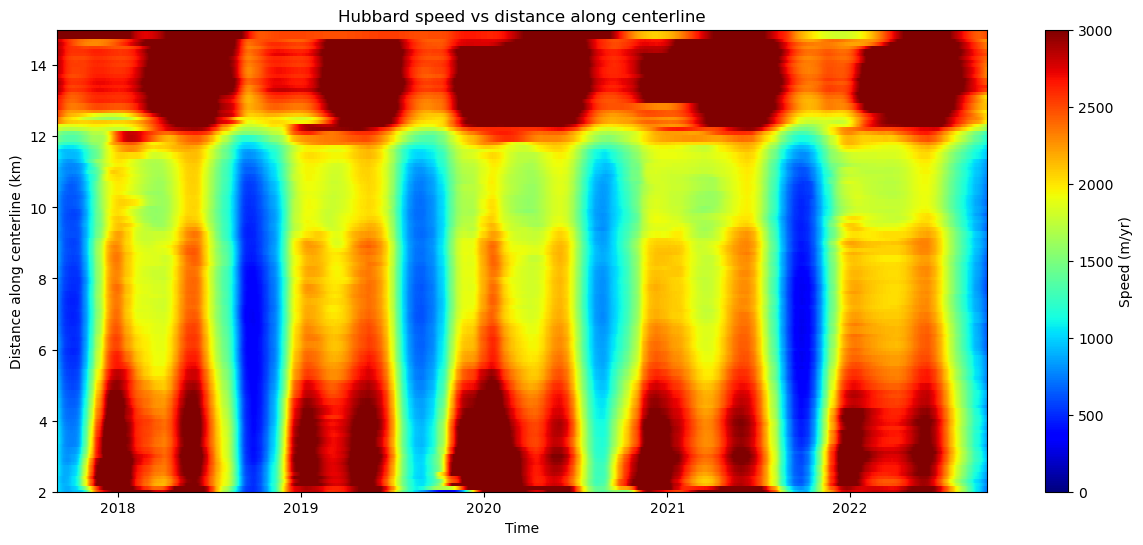

In [68]:
plt.figure(figsize=(15, 6))
plt.pcolormesh(tsteps, np.arange(len(points))/10, speeds.T, cmap="jet", vmin=0, vmax=3000)
#plt.contour(tsteps, np.arange(len(points))/10, speeds.T, [1000, 2000, 2500, 3000, 4000])

plt.xlabel("Time")
plt.ylabel("Distance along centerline (km)")
plt.colorbar(label="Speed (m/yr)")
plt.xlim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
plt.ylim(2, 15)
plt.title("Hubbard speed vs distance along centerline")
plt.savefig("centerline.png", bbox_inches="tight", dpi=300)

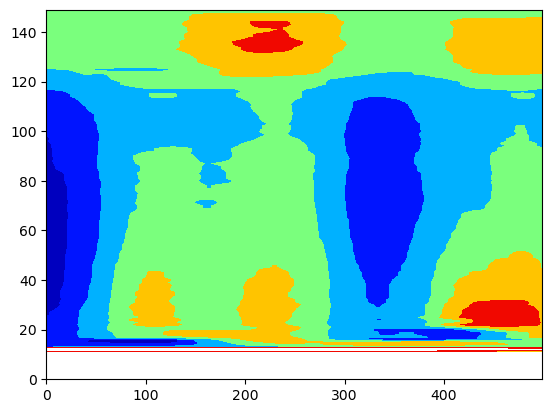

In [22]:
plt.contourf(speeds[1000:1500,:150].T, [10, 100, 500, 1000, 2000, 3000, 4000, 5000], cmap="jet", vmax=5000)